**Step1: Import Libraries**

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#it is used because whatever plot we make using matplot that plot is made in jupyter notebook
import warnings
warnings.filterwarnings("ignore")
#hide all warnings

**step2: Importing Datasets**

In [141]:
df=pd.read_csv("/content/googleplaystore.csv")
df_user=pd.read_csv("/content/googleplaystore_user_reviews.csv")

In [142]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [143]:
df_user.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [144]:
#important
#set options to be maximum for rows and columns:-
#it will give complete dataset-we can see above dataset in middle there is ----- dasline some rows are represented by dasline so whenever we want complte data tha we do this
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)



**Step3: Inspecting Dataset and Cleaning**

In [145]:

df.shape

(10841, 13)

In [146]:
print(f"The number of rows {df.shape[0]}, and columns are {df.shape[1]}.")

The number of rows 10841, and columns are 13.


In [147]:
print(f"The Name of columns:{df.columns}")

The Name of columns:Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [148]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [149]:
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [150]:
#we have other numeric column also other than Rating so dtype conversion needed in some columns(Reviews,	Size,	Installs,Price)


In [151]:
#conversion of size Data type.but before that we have to explore a little more about size column
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Observations of size column: Three different category

1.Varies with device

2.k

3.M

In [152]:
df["Size"].isnull().sum()
#No missing values present in size column so we can focus on converaion of data type of Size column

np.int64(0)

In [153]:
#find the values having k in them
df["Size"].loc[df["Size"].str.contains("k")].value_counts().sum()

np.int64(316)

In [154]:
#find the values having M in them
df["Size"].loc[df["Size"].str.contains("M")].value_counts().sum()

np.int64(8829)

In [155]:
#find the values having "Varies with device" in them
df["Size"].loc[df["Size"].str.contains("Varies with device")].value_counts().sum()

np.int64(1695)

In [156]:
#316+8829+1695 =10840 (1 value missing)
# after some analysis i have seen that one extra('1,000+' )  value is present

In [157]:
df[df["Size"]=="1,000+"]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [158]:
#we can see that here is some details shifte towards left side--it should be like this=category -NA,  rating-1.9,reviews-19.0........ just like this
#so for simplification we will drop this
df.drop(df[df["Size"]=="1,000+"].index,inplace=True)


In [159]:
df.shape #rows-10840, earlier it used to be 10841

(10840, 13)

In [160]:
#Convert the whoke Size column into Bytes..as we know app has size in bytes
#let's make  functions for conversion

def convert_size(size):
   if isinstance(size,str):
    if "k" in size:
      return float(size.replace("k",""))*1024
    elif "M" in size:
      return float(size.replace("M",""))*1024*1024
    elif "Varies with device" in size:
      return np.nan
   return size



In [161]:
df["Size"]=df["Size"].apply(convert_size)

In [162]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews        Size     Installs  Type Price Content Rating  \
0     159  19922944.0      10,000+  Free     0       Everyone   
1     967  14680064.0     500,000+  Free     0       Everyone   
2   87510   9122611.2   5,000,000+  Free     0       Everyone   
3  215644  26214400.0  50,000,000+  Free     0           Teen   
4     967   2936012.8     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [163]:
df.rename(columns={"Size":"Size(bytes)"},inplace=True)

In [164]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size(bytes)     Installs  Type Price Content Rating  \
0     159   19922944.0      10,000+  Free     0       Everyone   
1     967   14680064.0     500,000+  Free     0       Everyone   
2   87510    9122611.2   5,000,000+  Free     0       Everyone   
3  215644   26214400.0  50,000,000+  Free     0           Teen   
4     967    2936012.8     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [165]:
#we can convert size colum to MegaBytes also (MB)
#df["Size(mb)"] = df["Size(bytes)"].apply(lambda x:x/(1024*1024))

In [166]:
#we can convert size colum to MegaBytes also (MB)
#df["Size(kb)"] = df["Size(bytes)"].apply(lambda x:x/(1024*1024))

In [167]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size(bytes)     Installs  Type Price Content Rating  \
0     159   19922944.0      10,000+  Free     0       Everyone   
1     967   14680064.0     500,000+  Free     0       Everyone   
2   87510    9122611.2   5,000,000+  Free     0       Everyone   
3  215644   26214400.0  50,000,000+  Free     0           Teen   
4     967    2936012.8     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [168]:
#Convrsion of Datatype of review columns-as it will take discrete value

In [169]:
df["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [170]:
df["Reviews"].isnull().sum()
#no missing value present

np.int64(0)

In [171]:
df["Reviews"]=df["Reviews"].astype(int)

In [172]:
df["Reviews"].dtype

dtype('int64')

In [173]:
#let convert Datatype of Install columns
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [174]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [175]:
df["Installs"].isnull().sum()
#No missing value present in Install column

np.int64(0)

Observations: things to do for Data type conversion of **Install coluumns**

1.remove + signs

2.remove columns

3.convert the column into int type(columns value will be discrete)

In [176]:
df["Installs"]=df["Installs"].apply(lambda x:x.replace("+","") if "+" in str(x) else x)
df["Installs"]=df["Installs"].apply(lambda x:x.replace(",","") if "," in str(x) else x)

In [177]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [178]:
df["Installs"]=df["Installs"].astype("int")

In [179]:
df["Installs"].dtype

dtype('int64')

In [180]:
#Conversion of datatype of price
df["Price"].isnull().sum()
#no missing value present

np.int64(0)

In [181]:
df["Installs"].max()

1000000000

We can generate a new columns based on installation values, which willl be helpful in our analysis

In [182]:
#making a new column where we will make install categorywise
bins=[-1,0,10,1000,10000,100000,1000000,10000000,1000000000]
labels=["no","Very low","Low","Moderate","More than moderate","High","Very high","Top Notch"]
df["Installs_Category"]=pd.cut(df["Installs"],bins=bins,labels=labels)

In [183]:
df["Installs_Category"].value_counts()

Installs_Category
Low                   2161
High                  2118
Very high             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

In [184]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [185]:
df["Price"].value_counts()

Price
0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$3.49          7
$7.99          7
$24.99         7
$5.49          6
$19.99         6
$6.49          5
$8.99          5
$12.99         5
$11.99         5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$17.99         2
$10.99         2
$9.00          2
$79.99         2
$7.49          2
$3.95          2
$33.99         2
$1.70          2
$13.99         2
$8.49          2
$39.99         2
$1.50          1
$25.99         1
$74.99         1
$15.99         1
$3.88          1
$1.76          1
$3.02          1
$400.00        1
$4.84          1
$2.50          1
$1.59          1
$1.61          1
$4.77          1
$5.00          1
$1.29          1
$379.99        1
$299.99        1
$37.99         1
$18.99         1
$389.99        1
$19.90         1
$1.75          1
$14.00         1
$4.85          1
$46.99         1
$109.99        1
$154.99        1
$3.08          1
$2.59          1
$4.80          1
$1.96          1
$19.40         1
$3.90          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$3.28          1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56          1
$30.99         1
$3.61          1
$394.99        1
$1.26          1
$1.20          1
$1.04          1
Name: count, dtype: int64

Observation: to make price column to int data type

1.remove dollar(\$)  sign

2.some columns doesnot have dollar(\$) sign

In [186]:
#lets see how many values have $ sign:
df["Price"].loc[df["Price"].str.contains("\$")].value_counts().sum()

np.int64(800)

In [187]:
df["Price"]=df["Price"].apply(lambda x:x.replace("$","") if "$" in str(x) else x)

In [188]:
df["Price"].value_counts()

Price
0         10040
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
3.49          7
7.99          7
24.99         7
5.49          6
19.99         6
6.49          5
8.99          5
12.99         5
11.99         5
10.00         3
1.00          3
16.99         3
2.00          3
17.99         2
10.99         2
9.00          2
79.99         2
7.49          2
3.95          2
33.99         2
1.70          2
13.99         2
8.49          2
39.99         2
1.50          1
25.99         1
74.99         1
15.99         1
3.88          1
1.76          1
3.02          1
400.00        1
4.84          1
2.50          1
1.59          1
1.61          1
4.77          1
5.00          1
1.29          1
379.99        1
299.99        1
37.99         1
18.99         1
389.99        1
19.90         1
1.75          1
14.00         1
4.85          1
46.99         1
109.99        1
154.99        1
3.08          1
2.59          1
4.80          1
1.96          1
19.40         1
3.90          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
3.28          1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
30.99         1
3.61          1
394.99        1
1.26          1
1.20          1
1.04          1
Name: count, dtype: int64

In [189]:
#now we can convert
df["Price"]=df["Price"].astype("float")

In [190]:
df["Price"].dtype

dtype('float64')

In [191]:
df.describe() # all numerical columns are ready for analysis

Rating       Reviews   Size(bytes)      Installs         Price
count  9366.000000  1.084000e+04  9.145000e+03  1.084000e+04  10840.000000
mean      4.191757  4.441529e+05  2.256133e+07  1.546434e+07      1.027368
std       0.515219  2.927761e+06  2.368637e+07  8.502936e+07     15.949703
min       1.000000  0.000000e+00  8.704000e+03  0.000000e+00      0.000000
25%       4.000000  3.800000e+01  5.138022e+06  1.000000e+03      0.000000
50%       4.300000  2.094000e+03  1.363149e+07  1.000000e+05      0.000000
75%       4.500000  5.477550e+04  3.145728e+07  5.000000e+06      0.000000
max       5.000000  7.815831e+07  1.048576e+08  1.000000e+09    400.000000

**Observations:**
-We have only 5 numeric columns

-We can observe descriptive statistics of each columns and make tons of observation as per our hypothesis

-we can see rating column has Rating and Size column has some missing values

-Rating column has 1 minimum rating and 5 maximum rating

-minimum Price of a app is 0 and maximum is 400

-similarly we can observe for all the columns.

**Dealing of Missing Values**

There are different ways by which we can handle missing values

1.Missing value can be directly drop using df.dropna() (less than 45% missing value than we can drop)

2.Use imputation technique-mean,median,mode (if missing value % is grater than 45)

3.But if the columns null value we want to drop is having higher correlation to other columns than we use different method.

In [192]:
#missing values in Dataset coumnwise
df.isnull().sum().sort_values(ascending=False)

Size(bytes)          1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Category                0
Installs                0
Reviews                 0
App                     0
Price                   0
Genres                  0
Content Rating          0
Last Updated            0
Installs_Category       0
dtype: int64

In [193]:
#percentage of missing value columnwise
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

Size(bytes)          15.64
Rating               13.60
Current Ver           0.07
Android Ver           0.02
Type                  0.01
Category              0.00
Installs              0.00
Reviews               0.00
App                   0.00
Price                 0.00
Genres                0.00
Content Rating        0.00
Last Updated          0.00
Installs_Category     0.00
dtype: float64

<Axes: >

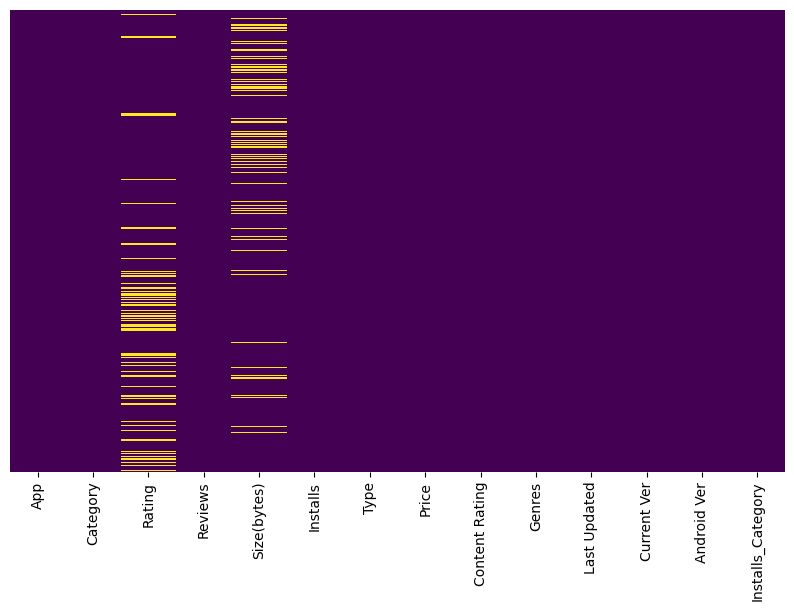

In [194]:
#plot  missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis") #cbar means right side bar of heatmapmshowing color gradient

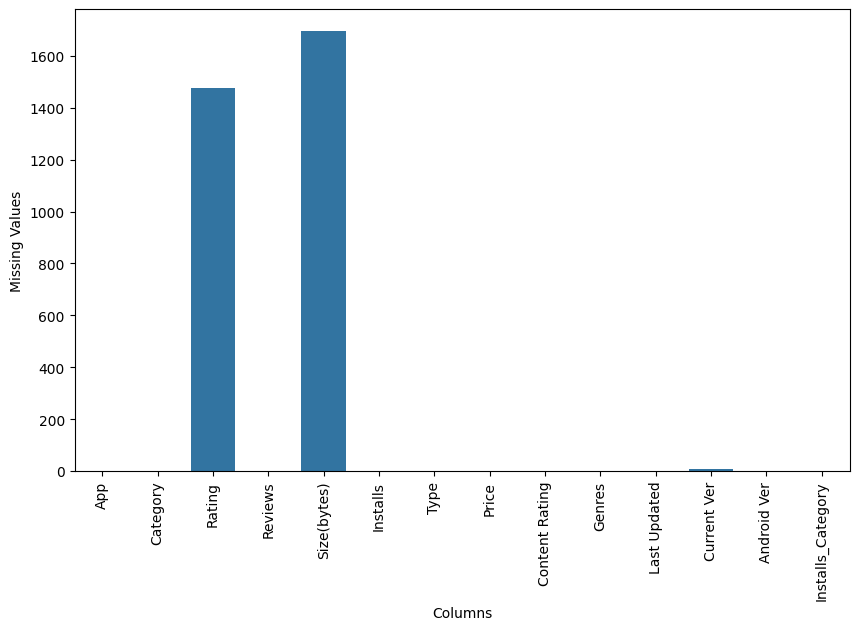

In [195]:
#missing value bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=df.isnull().sum().index,y=df.isnull().sum().values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.show()

**Observation:**

1.We have 1695 missing value in Size(bytes)	column.(15.64% missing value of the total values in column)

2.We have 1474 missing value in Rating column.(13.60% missing value of the total values in column)

3.We have 8 missing value in Current Ver column.(0.07% missing value of the total values in column)

4.We have 2 missing value in Android Ver column.(0.02% missing value of the total values in column)

5.We have 1 missing value in Type Vercolumn.(0.01% missing value of the total values in column)

**--So lets drop Current Ver, Android Ver and types columns as they are very less in number and it will not affect our data so much.**

In [196]:
df.dropna(subset=["Current Ver","Android Ver","Category", "Type"], inplace=True)

In [197]:
df.shape  # earlier total number of rows is 10840

(10829, 14)

**We cannot imputate the rating column directly beacause it is directly linked with the installation column. To test this hypothesis we need to plot the Rating Column with the Installs and Size(bytes) column with the installs and size columns and statistically test it using pearson correlation test.**

<Axes: >

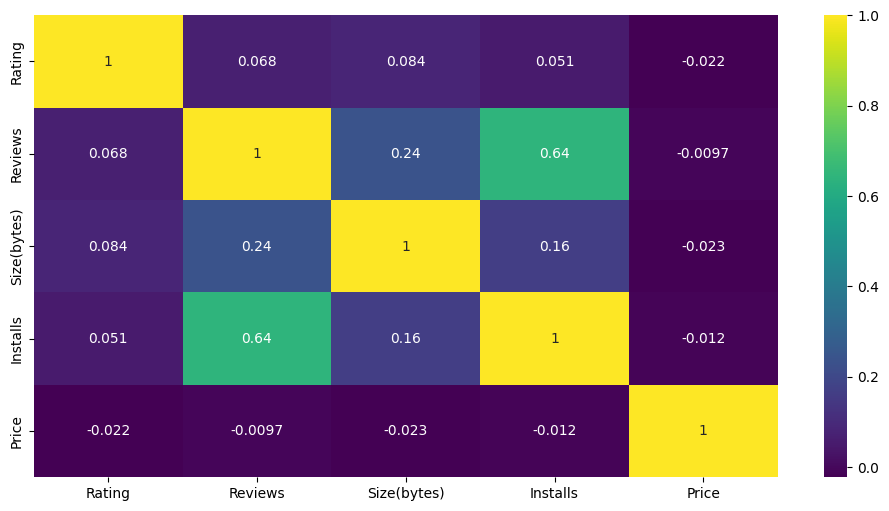

In [198]:
#Correlation
plt.figure(figsize=(12,6))
numeric_cols=["Rating","Reviews","Size(bytes)","Installs","Price"]
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap="viridis")

**Athought there is not much correlation(0.051) between Rating and Installs according to data but for example  if there is 0 installation of a particular app than we cannot give a mean rating or median rating to fillna in that case.**

In [199]:
df[numeric_cols].corr()

Rating   Reviews  Size(bytes)  Installs     Price
Rating       1.000000  0.068133     0.083643  0.051337 -0.021919
Reviews      0.068133  1.000000     0.238178  0.643112 -0.009674
Size(bytes)  0.083643  0.238178     1.000000  0.164721 -0.023058
Installs     0.051337  0.643112     0.164721  1.000000 -0.011698
Price       -0.021919 -0.009674    -0.023058 -0.011698  1.000000

**Observation: Correlation between Reviews and Installs is 0.643122.which is good**

In [200]:
#missing values in Dataset coumnwise
df.isnull().sum().sort_values(ascending=False)

Size(bytes)          1694
Rating               1469
Category                0
App                     0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_Category       0
dtype: int64

**Now we have Rating and Size(bytes) columns to deal with null values**

In [201]:
#find the trend of Rating in each installs_category
df.groupby("Installs_Category")["Rating"].describe()

count      mean       std  min  25%  50%  75%  max
Installs_Category                                                      
no                     0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN
Very low              81.0  4.637037  0.845199  1.0  4.8  5.0  5.0  5.0
Low                 1278.0  4.170970  0.825605  1.0  3.8  4.4  4.8  5.0
Moderate            1440.0  4.035417  0.604428  1.4  3.8  4.2  4.5  5.0
More than moderate  1616.0  4.093255  0.505619  1.6  3.9  4.2  4.5  4.9
High                2113.0  4.207525  0.376594  1.8  4.0  4.3  4.5  4.9
Very high           2004.0  4.287076  0.294902  2.0  4.1  4.3  4.5  4.9
Top Notch            828.0  4.374396  0.193726  3.1  4.3  4.4  4.5  4.8

In [202]:
# in which  Installs_Category the rating has null values(NaN)
df['Installs_Category'].loc[df['Rating'].isnull()].value_counts()

Installs_Category
Low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
High                    3
Very high               0
Top Notch               0
Name: count, dtype: int64

**here we can see Installs_Category "no" has 14 NaN value in that case we cannt directly use imputation technique mean or median, as there are no installation so no rating**

In [203]:
#Replacing the respective missing values of Rating, With respect to  average give in each "Installs_Category"

In [204]:
def fill_missing_ratings(df, category, fill_value):
  # Filter the DataFrame for rows where the category matches and rating is missing
  filtered_df = df[(df['Installs_Category'] == category) & df['Rating'].isnull()]
  # Fill the missing values with the specified value
  df.loc[filtered_df.index, 'Rating'] = fill_value
  return df


In [205]:
df = fill_missing_ratings(df, 'Low', 4.170970)
df = fill_missing_ratings(df, 'Very low', 4.637037)
df = fill_missing_ratings(df, 'Moderate', 4.035417)
df = fill_missing_ratings(df, 'More than moderate', 4.093255)
df = fill_missing_ratings(df, 'High', 4.207525)
df = fill_missing_ratings(df, 'Very high',4.287076 )
df = fill_missing_ratings(df, 'no', 0)

In [206]:
# in which Install_category the Rating has NaN values
df['Installs_Category'].loc[df['Rating'].isnull()].value_counts()

Installs_Category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very high             0
Top Notch             0
Name: count, dtype: int64

**Duplicate remove**

In [207]:
# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")


Number of duplicates in df are: 483


In [208]:
# remove the duplicates
df.drop_duplicates(inplace=True)

In [209]:
df.duplicated().sum()

np.int64(0)

**Lets plot some garphs to see some relations and trends betweens different variables**

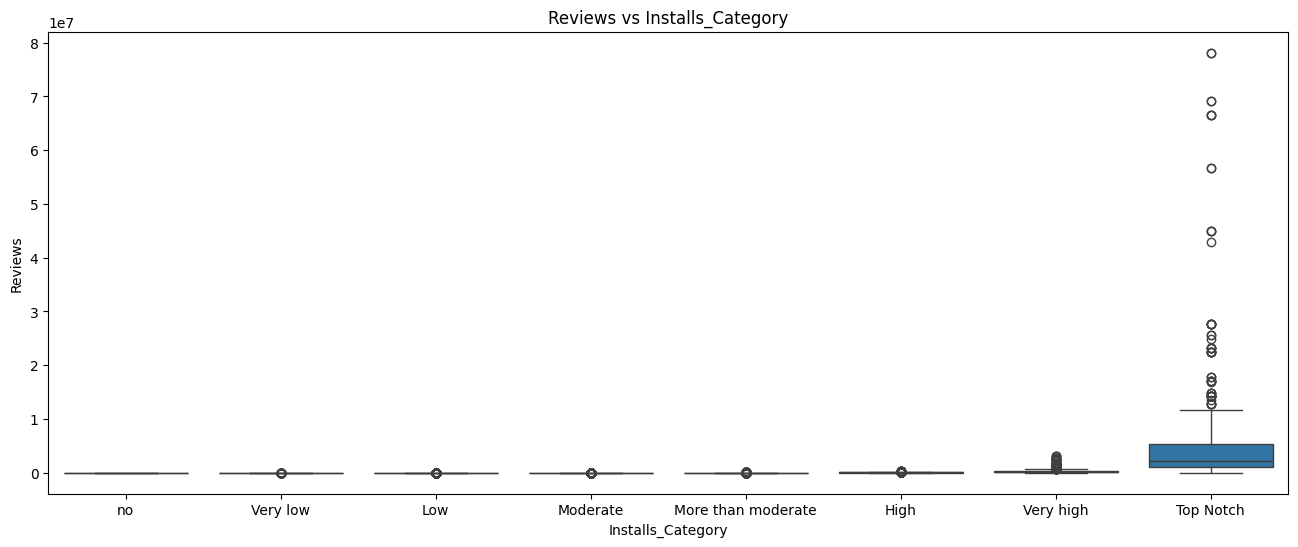

In [210]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6))
sns.boxplot(x='Installs_Category', y= 'Reviews', data=df)
plt.title("Reviews vs Installs_Category")
plt.xlabel('Installs_Category')
plt.ylabel('Reviews')
plt.show()
plt.show()

But as Y axis has a maximum value very large therefore we cannot see distribution of dataset in this plot..so lets convert it to logirthmic value

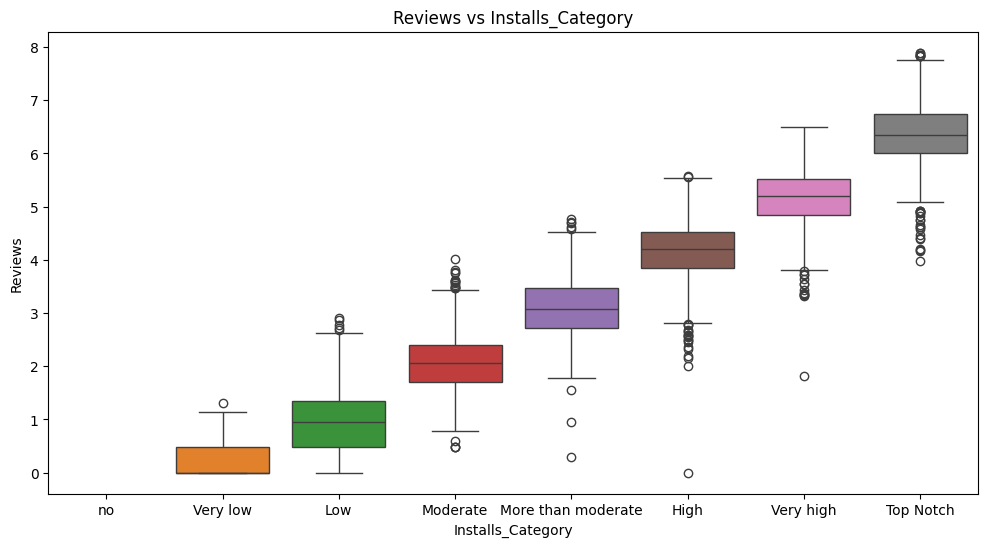

In [211]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(12, 6))
sns.boxplot(x='Installs_Category', y= np.log10(df['Reviews']),hue="Installs_Category" ,data=df)
plt.title("Reviews vs Installs_Category")
plt.xlabel('Installs_Category')
plt.ylabel('Reviews')
plt.show()

**We can spot outlier also**

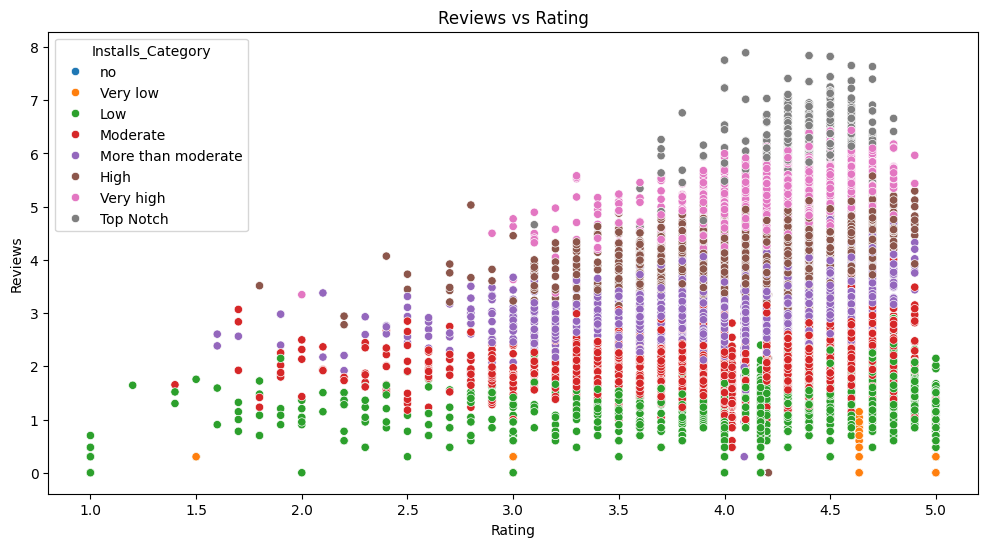

In [212]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rating', y=np.log10(df['Reviews']), hue='Installs_Category', data=df)
plt.title("Reviews vs Rating")
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

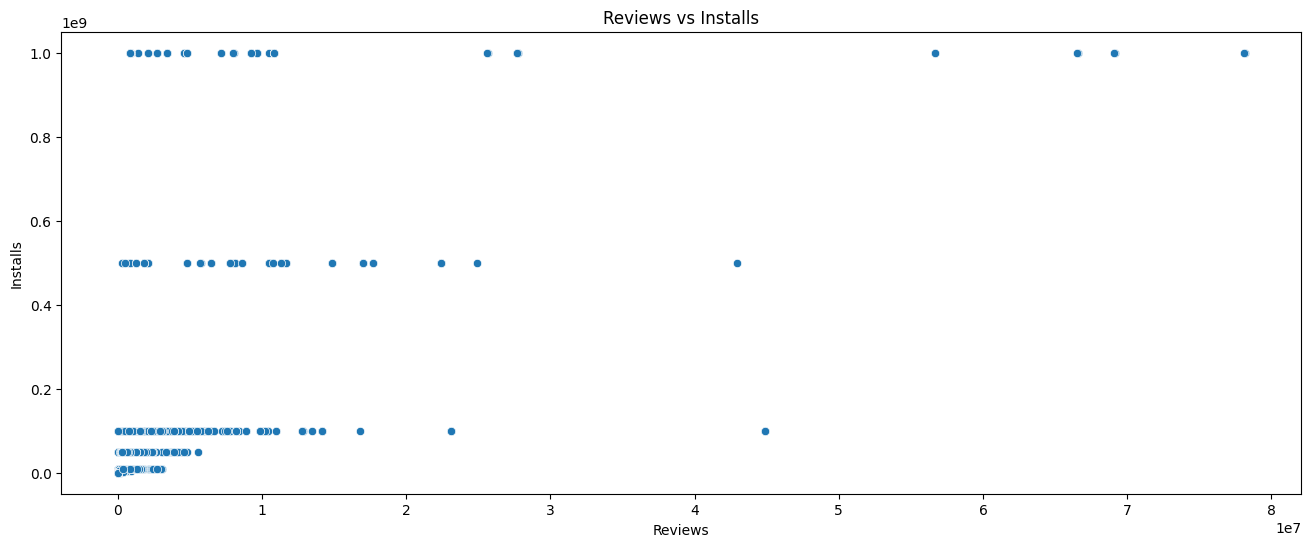

In [213]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Reviews', y='Installs', data=df)
plt.title("Reviews vs Installs")
plt.xlabel('Reviews')
plt.ylabel('Installs')
plt.show()

But as Y axis has a maximum value very large therefore we cannot see distribution of dataset in this plot..so lets convert it to logirthmic value

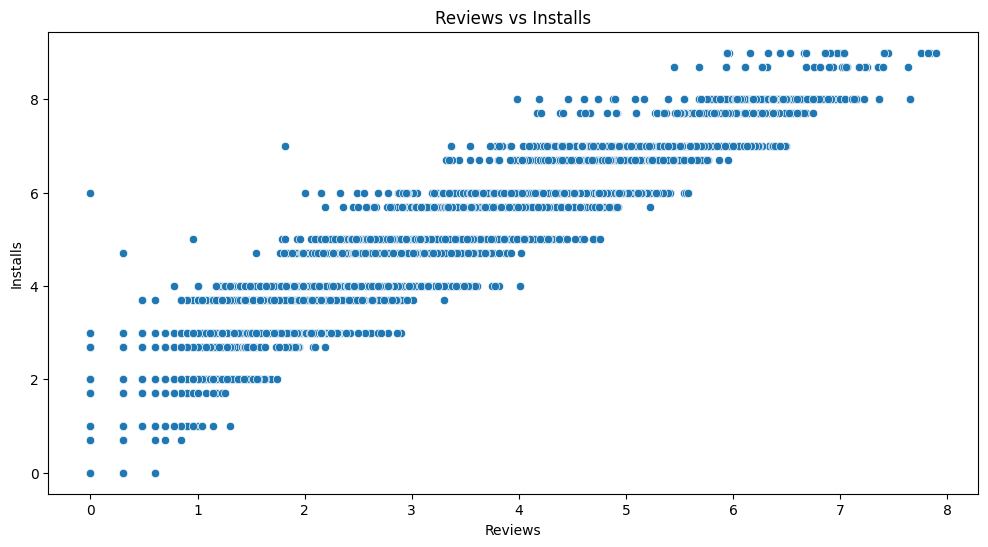

In [214]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(12, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df)
plt.title("Reviews vs Installs")
plt.xlabel('Reviews')
plt.ylabel('Installs')
plt.show()

**Observation:**

1.As number of install Increases, Reviews also incrases. Which is true in real world scenerio. As number of user incraeses, reviews also increases. We can see above plot they have direct relationship with each other.

Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+,
1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight
trends here. Let's plot a line plot to see the trend.


<Figure size 1200x600 with 0 Axes>

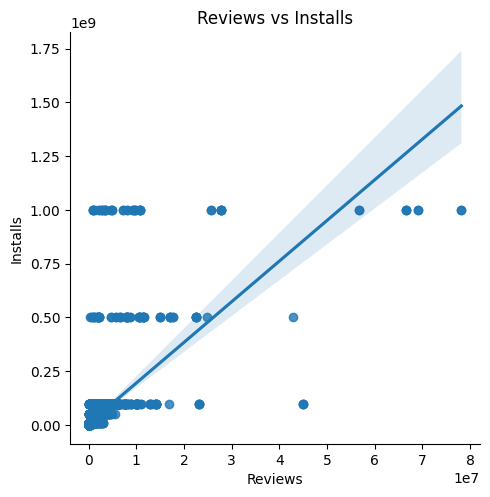

In [215]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(12, 6))
sns.lmplot(x='Reviews', y='Installs', data=df)
plt.title("Reviews vs Installs")
plt.xlabel('Reviews')
plt.ylabel('Installs')
plt.show()

In [216]:
#df.to_csv("GoogleplaystoreCleanedData.csv")

**Step 4: Insights from Data**

**#Which category has the highest rating?**

In [217]:
df["Category"].unique().shape

(33,)

In [218]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).reset_index() #(Highest Rating-we are taking mean)


Category    Rating
0                EVENTS  4.394346
1             EDUCATION  4.373794
2   BOOKS_AND_REFERENCE  4.358435
3       PERSONALIZATION  4.322099
4        ART_AND_DESIGN  4.298885
5                  GAME  4.281926
6    HEALTH_AND_FITNESS  4.273890
7             PARENTING  4.259759
8              SHOPPING  4.253376
9                SPORTS  4.253041
10              WEATHER  4.249133
11               BEAUTY  4.244167
12    AUTO_AND_VEHICLES  4.231531
13               SOCIAL  4.230009
14         PRODUCTIVITY  4.218895
15              MEDICAL  4.205945
16               FAMILY  4.197641
17       FOOD_AND_DRINK  4.188011
18          PHOTOGRAPHY  4.186570
19             BUSINESS  4.178729
20        COMMUNICATION  4.177694
21       HOUSE_AND_HOME  4.169548
22   LIBRARIES_AND_DEMO  4.168599
23               COMICS  4.154404
24   NEWS_AND_MAGAZINES  4.138558
25        ENTERTAINMENT  4.136036
26            LIFESTYLE  4.123480
27              FINANCE  4.117404
28     TRAVEL_AND_LOCAL  4.098970
29                TOOLS  4.080989
30        VIDEO_PLAYERS  4.077823
31  MAPS_AND_NAVIGATION  4.071166
32               DATING  4.037159

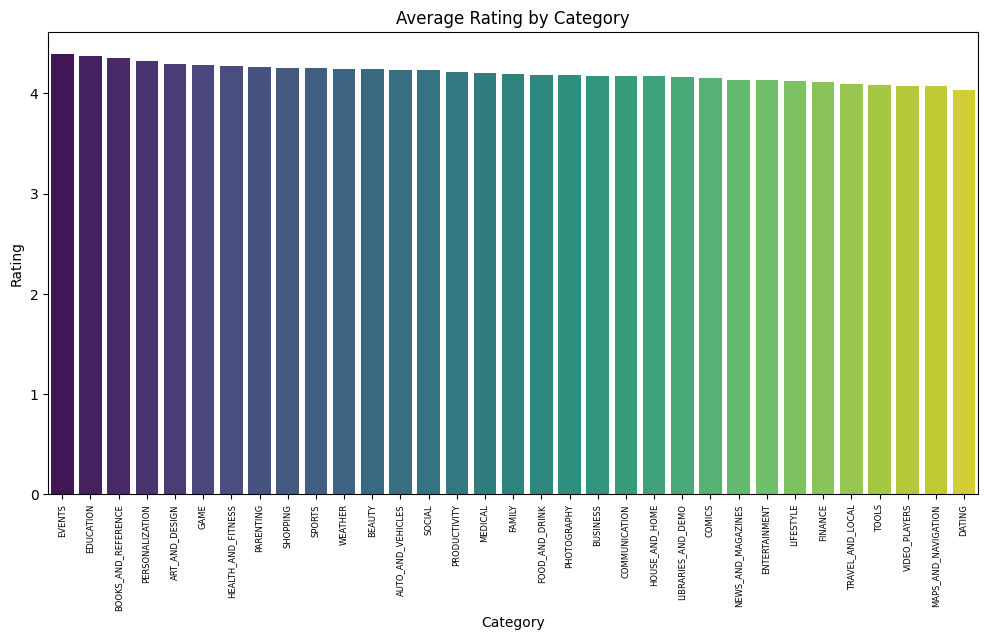

In [219]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Rating', data=df.groupby('Category')['Rating'].mean().sort_values(ascending=False).reset_index(), palette="viridis")
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Average Rating by Category')
plt.xticks(rotation=90,fontsize=6)
plt.show()

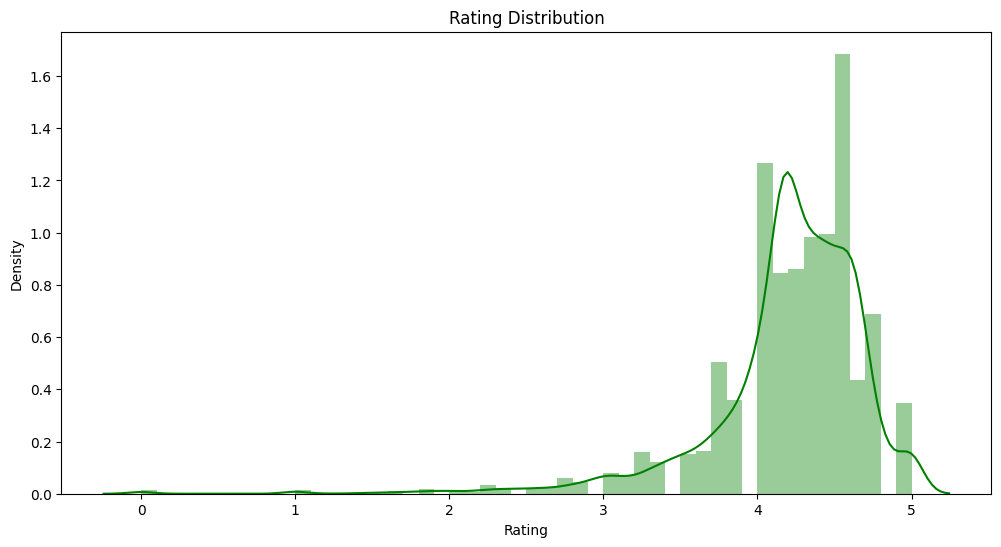

In [220]:
# plot the rating distribution
plt.figure(figsize=(12, 6))
sns.distplot(df['Rating'], color="green",kde=True)
plt.title("Rating Distribution")
plt.show()

**Observation:**

1. Top 5 Category according to Rating are:
-	EVENTS-4.394346

- EDUCATION-4.373794

- BOOKS_AND_REFERENCE-4.358435

- PERSONALIZATION-4.322099

- ART_AND_DESIGN-4.298885

2. Almost 33 unique Category of Playstore have average rating 4+.

**#Which category has the highest number of reviews?**

In [221]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).reset_index()

Category     Reviews
0                  GAME  1415536650
1         COMMUNICATION   601273552
2                SOCIAL   533576829
3                FAMILY   396771746
4                 TOOLS   273181033
5           PHOTOGRAPHY   204297410
6         VIDEO_PLAYERS   110380188
7          PRODUCTIVITY   102554498
8              SHOPPING    94931162
9       PERSONALIZATION    75192744
10               SPORTS    65322708
11     TRAVEL_AND_LOCAL    55565160
12        ENTERTAINMENT    47570716
13   NEWS_AND_MAGAZINES    38245873
14   HEALTH_AND_FITNESS    30845186
15  MAPS_AND_NAVIGATION    30659254
16            EDUCATION    23165500
17  BOOKS_AND_REFERENCE    21873219
18              FINANCE    16999891
19              WEATHER    14604735
20            LIFESTYLE    12820575
21             BUSINESS    12358171
22       FOOD_AND_DRINK     7671576
23               DATING     5545397
24               COMICS     3383276
25       HOUSE_AND_HOME     2794772
26       ART_AND_DESIGN     1714385
27              MEDICAL     1396757
28    AUTO_AND_VEHICLES     1163666
29   LIBRARIES_AND_DEMO     1016973
30            PARENTING      958331
31               BEAUTY      396240
32               EVENTS      161018

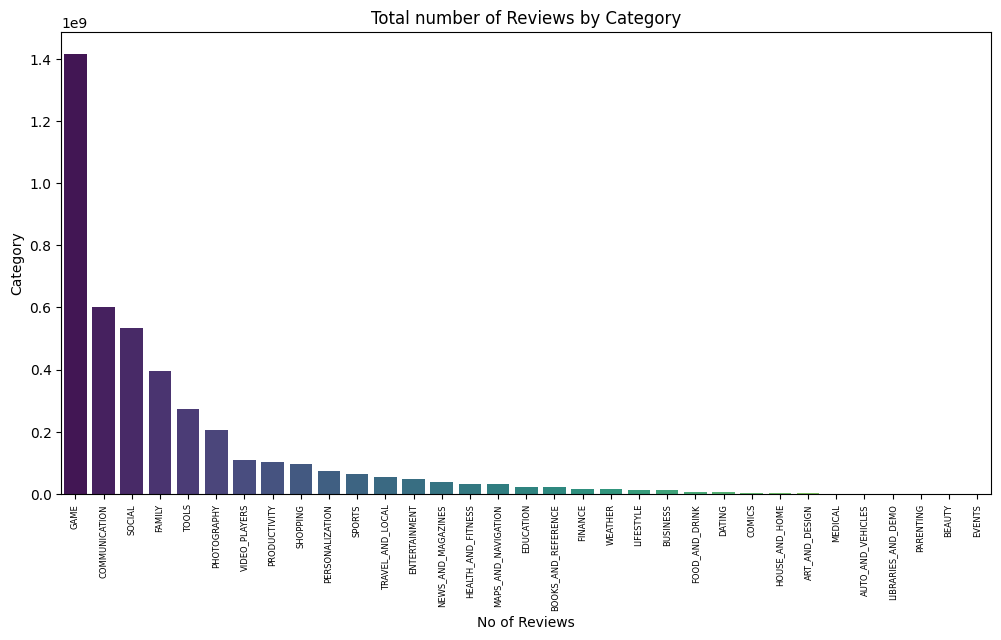

In [222]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category',y="Reviews",data=df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).reset_index(), palette="viridis")
plt.xlabel('No of Reviews')
plt.ylabel('Category')
plt.title('Total number of Reviews by Category')
plt.xticks(rotation=90,fontsize=6)
plt.show()

**Observation:**

1.Top 5 Category which has highest Reviews are:
- GAME - 1415536650 Reviews
-	COMMUNICATION	- 601273552 Reviews
-	SOCIAL - 533576829 Reviews
-	FAMILY - 396771746 Reviews
-	TOOLS	- 273181033 Reviews

**#Which category has the highest number of installs?**

In [223]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index().head(5)

Category     Installs
0           GAME  31544024415
1  COMMUNICATION  24152276251
2         SOCIAL  12513867902
3   PRODUCTIVITY  12463091369
4          TOOLS  11452271905

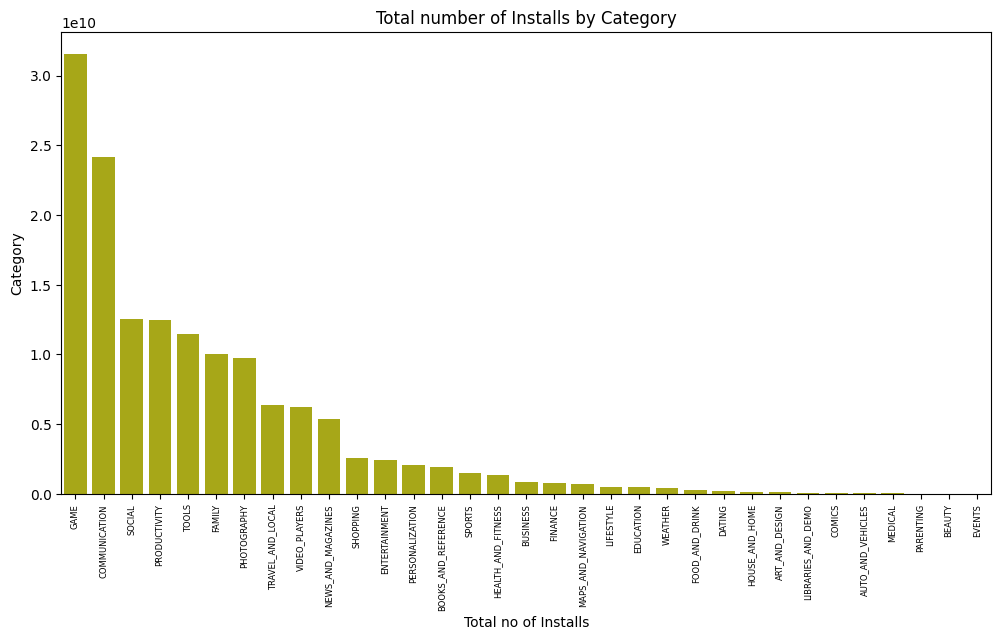

In [224]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category',y="Installs",data=df.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index(), color="y")
plt.xlabel('Total no of Installs')
plt.ylabel('Category')
plt.title('Total number of Installs by Category')
plt.xticks(rotation=90,fontsize=6)
plt.show()

**Observation:**

1.Top 5 Category which is highest Installed  are:
- GAME - 31544024415 Installs
-	COMMUNICATION	- 24152276251 Installs
- SOCIAL - 12513867902 Installs
- PRODUCTIVITY- 12463091369 Installs
- TOOLS - 11452271905 Installs
2.Games lead by far with 31.5B installs, showing huge global interest in mobile gaming.

3.Communication apps (24.2B installs) highlight mobile’s role in staying connected.

4.Social and productivity apps are nearly tied (~12.5B installs), reflecting balanced use for fun and work.

5.Tools category (11.4B installs) shows strong demand for device-enhancing utilities.

**# Which category has the highest number of apps?**

In [225]:
df['Category'].value_counts().sort_values(ascending=False).reset_index().head(5)

Category  count
0    FAMILY   1939
1      GAME   1121
2     TOOLS    841
3  BUSINESS    427
4   MEDICAL    408

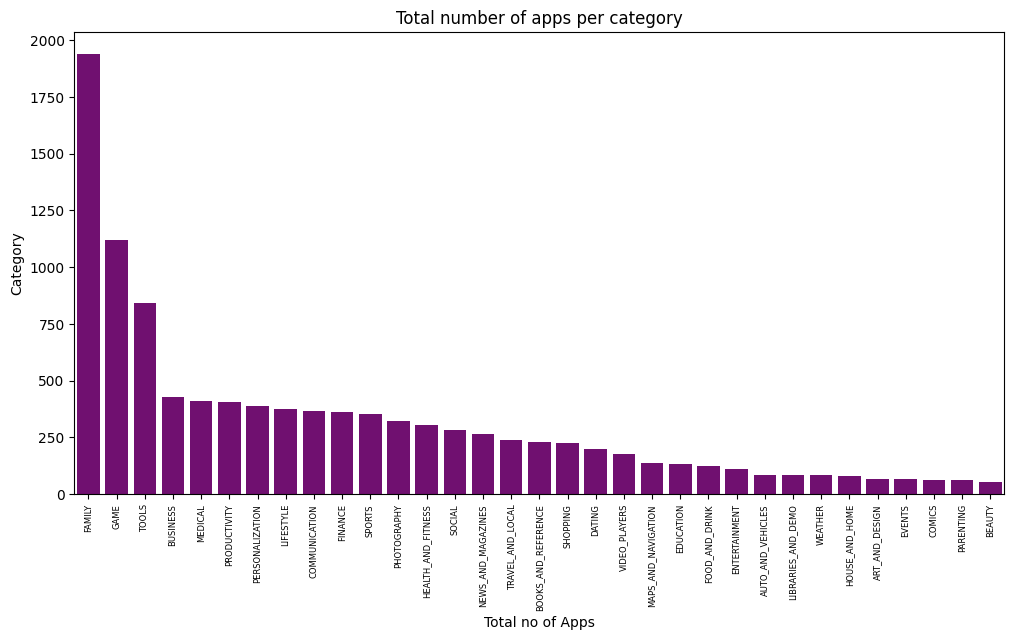

In [226]:
#total number of apps per category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category',y="count",data=df['Category'].value_counts().sort_values(ascending=False).reset_index(), color="purple")
plt.xlabel('Total no of Apps')
plt.ylabel('Category')
plt.xticks(rotation=90,fontsize=6)
plt.title("Total number of apps per category")
plt.show()


**Observation:**

1.Top 5 Category which has highest app are:

1. The **Family** category has the most apps (1,939), showing how much focus there is on apps for kids and household use.  
2. **Games** come next with 1,121 apps—no surprise, since it's such a popular space for both users and developers.  
3. There are **841 Tools apps**, which makes sense since people often look for ways to boost their phone’s performance or features.  
4. **Business and Medical** categories also have a solid presence, with 427 and 408 apps, showing growing interest in work and health-related solutions.

**# Find Top most 5 genres**

In [227]:
df['Genres'].value_counts().head(5)

Genres
Tools            840
Entertainment    587
Education        526
Business         427
Medical          408
Name: count, dtype: int64

In [228]:
top_5genres=df['Genres'].value_counts().head(5)


In [229]:
top_5genres

Genres
Tools            840
Entertainment    587
Education        526
Business         427
Medical          408
Name: count, dtype: int64

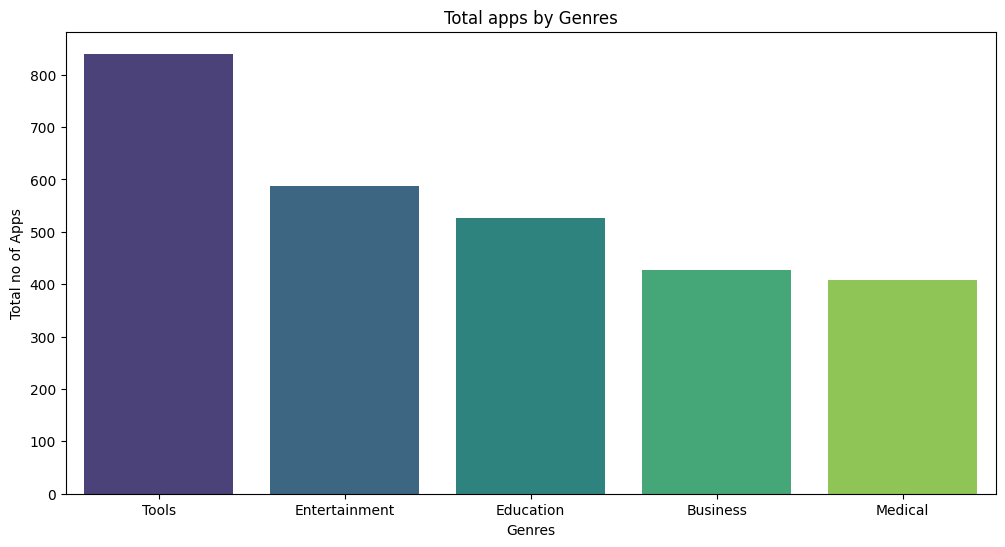

In [230]:
#plot top 5 generes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5genres.index,y=top_5genres.values, palette="viridis")
plt.title("Total apps by Genres")
plt.xlabel('Genres')
plt.ylabel('Total no of Apps')
plt.show()


**Observation**:  
**Top 5 Genres with the Most Apps are:**

1. **Tools** has the most apps (840), which makes sense since people often look for ways to improve their phone's performance.  
2. **Entertainment** is next with 587 apps—lots of options for movies, music, and fun.  
3. **Education** has 526 apps, showing that learning through mobile apps is pretty popular now.  
4. **Business** comes in with 427 apps, helping people stay productive and organized.  
5. **Medical** has 408 apps, reflecting a growing interest in health and wellness through technology.

**# Top 5 apps by Reviews**

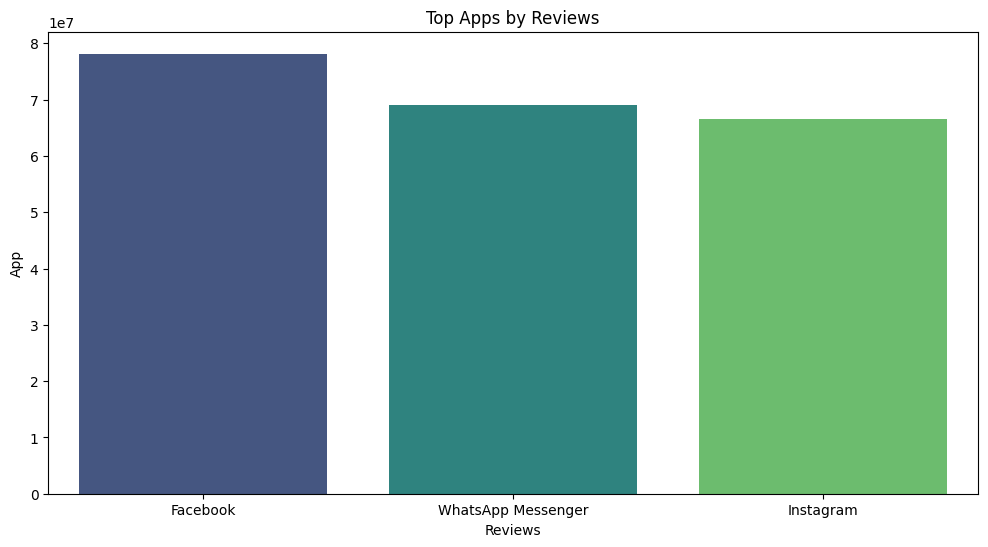

In [231]:
plt.figure(figsize=(12,6))
sns.barplot(y='Reviews',x="App",data=df.sort_values("Reviews",ascending=False).head(5), palette="viridis")
plt.xlabel('Reviews')
plt.ylabel('App')
plt.title("Top Apps by Reviews")
plt.show()


**Observation:**  
1. **Facebook**, **WhatsApp Messenger**, and **Instagram** have the highest number of reviews, showing just how widely used and engaged users are with these social media and communication apps.

**# Number of installs for Free vs Paid**

In [232]:
df.groupby("Type")["Installs"].mean().sort_values(ascending=False).reset_index()

Type      Installs
0  Free  1.529227e+07
1  Paid  9.078067e+04

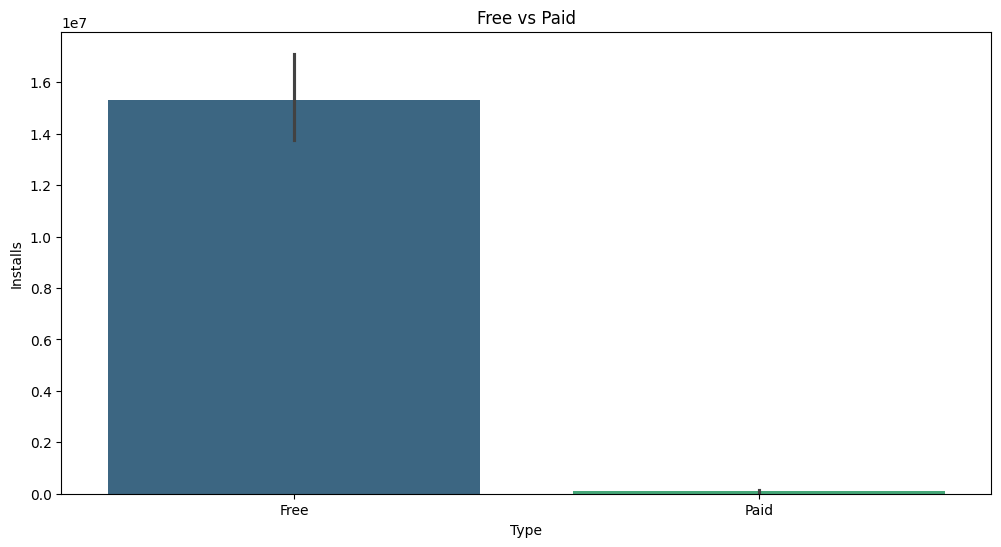

In [233]:
#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Type',y="Installs",data=df, palette="viridis")
plt.title("Free vs Paid")
plt.xlabel('Type')
plt.show()

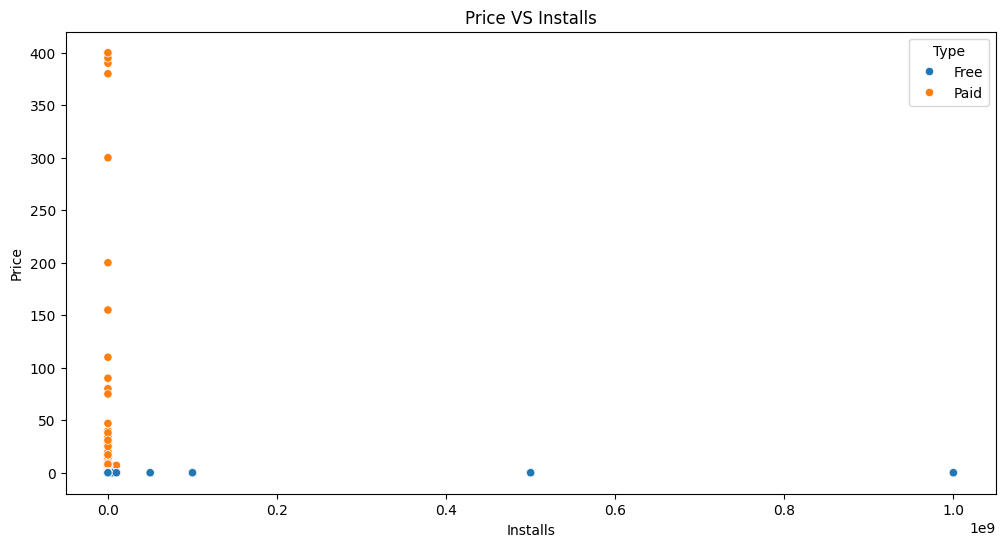

In [234]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Installs",y="Price",hue="Type",data=df)
plt.title("Price VS Installs")
plt.show()

**Observation:**  
1. Most people go for **free apps**, with over **15 million installs**, which isn’t surprising since they don’t cost anything.  
2. **Paid apps** have way fewer installs (around **90,000**), showing that users usually prefer free options.

**#Size of a App  VS Installs**

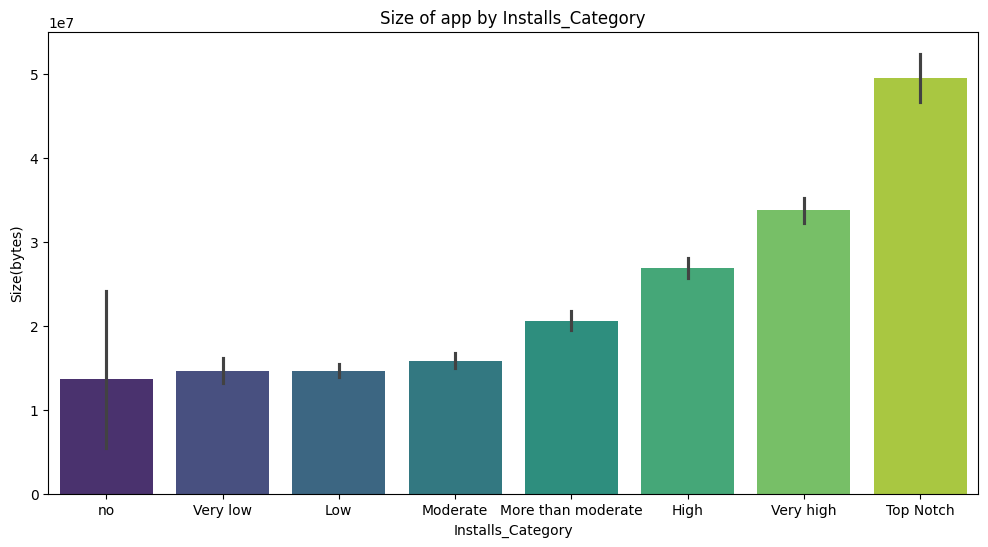

In [235]:
plt.figure(figsize=(12,6))
sns.barplot(x="Installs_Category",y="Size(bytes)",data=df, palette="viridis")
plt.title("Size of app by Installs_Category")
plt.xlabel('Installs_Category')
plt.ylabel('Size(bytes)')
plt.show()

**Observation:**  
As the **app size increases**, the **number of installs also tends to increase**.

It implies that **larger apps**—which often have more features, better graphics, or higher quality—are more likely to attract users. People may associate **bigger apps with better performance or richer experiences**, especially in categories like games or entertainment.

**#Top  Content Rating by Installs**

In [236]:
df["Content Rating"].value_counts()

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

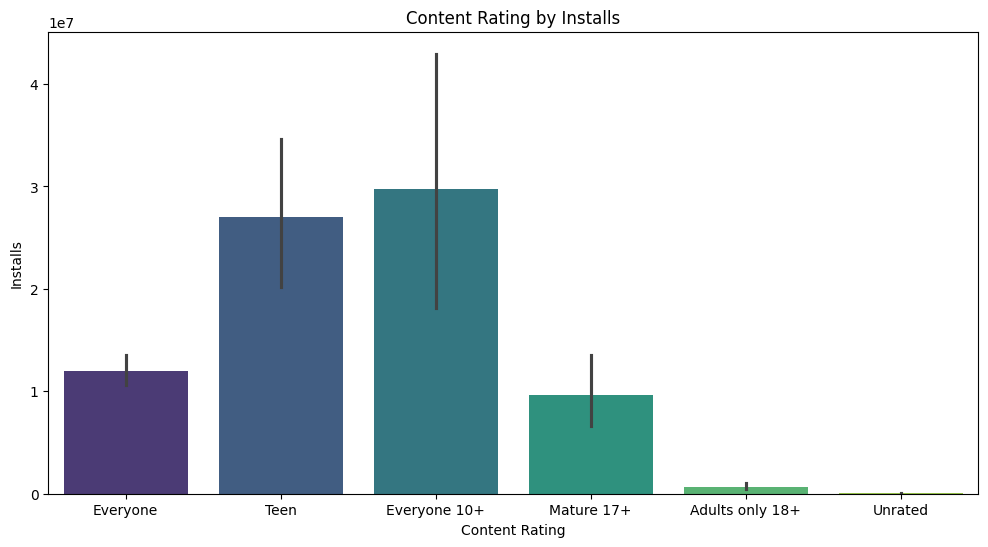

In [237]:
plt.figure(figsize=(12,6))
sns.barplot(x="Content Rating",y="Installs",data=df, palette="viridis")
plt.title("Content Rating by Installs")
plt.xlabel('Content Rating')
plt.ylabel('Installs')
plt.show()

**Observation:**  
Apps rated **"Everyone 10+"** have the highest number (8,372), followed by **"Teen"** and **"Everyone"**.
This shows that **family-friendly apps** are the most popular, as they appeal to a wider audience. Developers may prefer targeting "Everyone" ratings to reach more users and get higher installs.Ultimately Which will increase their revenue.

**#Top 5 free app by rating**

In [238]:
df[df["Type"]=="Free"].sort_values("Rating",ascending=False).head(5)

App Category  Rating  Reviews  \
10820                   Fr. Daoud Lamei   FAMILY     5.0       22   
10837  Fr. Mike Schmitz Audio Teachings   FAMILY     5.0        4   
5148                       Kimbrough AH  MEDICAL     5.0        5   
9806               Dr. ES PV Calculator    TOOLS     5.0       19   
5139                       Chenoweth AH  MEDICAL     5.0        1   

       Size(bytes)  Installs  Type  Price Content Rating     Genres  \
10820    9017753.6      1000  Free    0.0           Teen  Education   
10837    3774873.6       100  Free    0.0       Everyone  Education   
5148    29360128.0       100  Free    0.0       Everyone    Medical   
9806    11534336.0       500  Free    0.0       Everyone      Tools   
5139    28311552.0       100  Free    0.0       Everyone    Medical   

             Last Updated  Current Ver   Android Ver Installs_Category  
10820       June 27, 2018        3.8.0    4.1 and up               Low  
10837        July 6, 2018          1.0    4.1 and up               Low  
5148   September 21, 2017  300000.0.90  4.0.3 and up               Low  
9806       March 11, 2018   3.4.7.2.16    4.1 and up               Low  
5139        April 3, 2017  300000.0.78  4.0.3 and up               Low

In [239]:
df[(df["Type"]=="Free") & (df["Rating"]==5)].shape

(243, 14)

**Observation: 1.243  Free apps has rating equals to 5.**




**#Top 5 paid apps by rating**

In [240]:
df[df["Type"]=="Paid"].sort_values("Rating",ascending=False).head(5)

App             Category  Rating  Reviews  \
10697                 Mu.F.O.                 GAME     5.0        2   
5246    Hey AJ! It's Bedtime!               FAMILY     5.0        1   
4988     Easy Hotspot Ad Free                TOOLS     5.0        2   
10690                FO Bixby      PERSONALIZATION     5.0        5   
5237   Hey AJ! It's Saturday!  BOOKS_AND_REFERENCE     5.0       12   

       Size(bytes)  Installs  Type  Price Content Rating             Genres  \
10697   16777216.0         1  Paid   0.99       Everyone             Arcade   
5246    66060288.0        10  Paid   4.99       Everyone          Education   
4988     3460300.8        10  Paid   0.99       Everyone              Tools   
10690     881664.0       100  Paid   0.99       Everyone    Personalization   
5237    52428800.0       100  Paid   3.99       Everyone  Books & Reference   

         Last Updated Current Ver Android Ver Installs_Category  
10697   March 3, 2017         1.0  2.3 and up          Very low  
5246    April 4, 2018      1.0.59  2.3 and up          Very low  
4988    July 26, 2018        1.05  4.0 and up          Very low  
10690  April 25, 2018         0.2  7.0 and up               Low  
5237    June 13, 2016       1.0.0  2.2 and up               Low

In [241]:
df[(df["Type"]=="Paid") & (df['Rating']==5)].shape

(28, 14)

**Observation:28  Paid apps has rating equals to 5.**



**#Top 5 paid App by reviews**

In [242]:
df[df["Type"]=="Paid"].sort_values("Reviews",ascending=False)["App"].head(5)

2241                        Minecraft
4347                        Minecraft
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
8860                      Bloons TD 5
Name: App, dtype: object

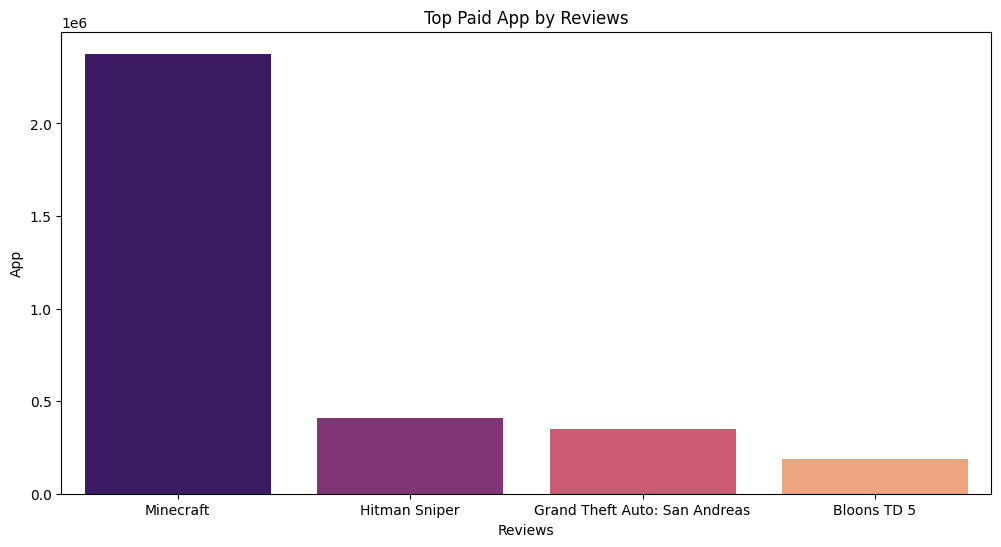

In [243]:
plt.figure(figsize=(12,6))
sns.barplot(y='Reviews',x="App",data=df[df["Type"]=="Paid"].sort_values("Reviews",ascending=False).head(5), palette="magma")
plt.title("Top Paid App by Reviews")
plt.xlabel('App')
plt.ylabel('Reviews')
plt.show()

**Observation:**  
Popular paid games like Minecraft and GTA get more reviews because people trust well-known titles and are happy to pay for them.

**#Top 10 Paid Apps Based on Revenue Generated**

In [244]:
df["Revenue"]=df["Installs"]*df["Price"]

In [245]:
df[(df["Type"]=="Paid") & (df["Revenue"]>0)].sort_values("Revenue",ascending=False).head(11).drop_duplicates(subset=["App"])

App     Category  Rating  Reviews  \
2241                      Minecraft       FAMILY     4.5  2376564   
5351                      I am rich    LIFESTYLE     3.8     3547   
5356              I Am Rich Premium      FINANCE     4.1     1867   
4034                  Hitman Sniper         GAME     4.6   408292   
7417  Grand Theft Auto: San Andreas         GAME     4.4   348962   
5578        Sleep as Android Unlock    LIFESTYLE     4.5    23966   
2883            Facetune - For Free  PHOTOGRAPHY     4.4    49553   
8804            DraStic DS Emulator         GAME     4.6    87766   
4367       I'm Rich - Trump Edition    LIFESTYLE     3.6      275   
5354                 I am Rich Plus       FAMILY     4.0      856   

      Size(bytes)  Installs  Type   Price Content Rating  \
2241          NaN  10000000  Paid    6.99   Everyone 10+   
5351    1887436.8    100000  Paid  399.99       Everyone   
5356    4928307.2     50000  Paid  399.99       Everyone   
4034   30408704.0  10000000  Paid    0.99     Mature 17+   
7417   27262976.0   1000000  Paid    6.99     Mature 17+   
5578     892928.0   1000000  Paid    5.99       Everyone   
2883   50331648.0   1000000  Paid    5.99       Everyone   
8804   12582912.0   1000000  Paid    4.99       Everyone   
4367    7654604.8     10000  Paid  400.00       Everyone   
5354    9122611.2     10000  Paid  399.99       Everyone   

                         Genres       Last Updated Current Ver  \
2241  Arcade;Action & Adventure      July 24, 2018     1.5.2.1   
5351                  Lifestyle   January 12, 2018         2.0   
5356                    Finance  November 12, 2017         1.6   
4034                     Action      July 12, 2018  1.7.110758   
7417                     Action     March 21, 2015        1.08   
5578                  Lifestyle      June 27, 2018    20180608   
2883                Photography      July 25, 2018       1.3.1   
8804                     Action      July 19, 2016   r2.5.0.3a   
4367                  Lifestyle        May 3, 2018       1.0.1   
5354              Entertainment       May 19, 2018         3.0   

             Android Ver   Installs_Category     Revenue  
2241  Varies with device           Very high  69900000.0  
5351        4.0.3 and up  More than moderate  39999000.0  
5356          4.0 and up  More than moderate  19999500.0  
4034          4.1 and up           Very high   9900000.0  
7417          3.0 and up                High   6990000.0  
5578          4.0 and up                High   5990000.0  
2883          4.1 and up                High   5990000.0  
8804          2.3 and up                High   4990000.0  
4367          4.1 and up            Moderate   4000000.0  
5354          4.4 and up            Moderate   3999900.0

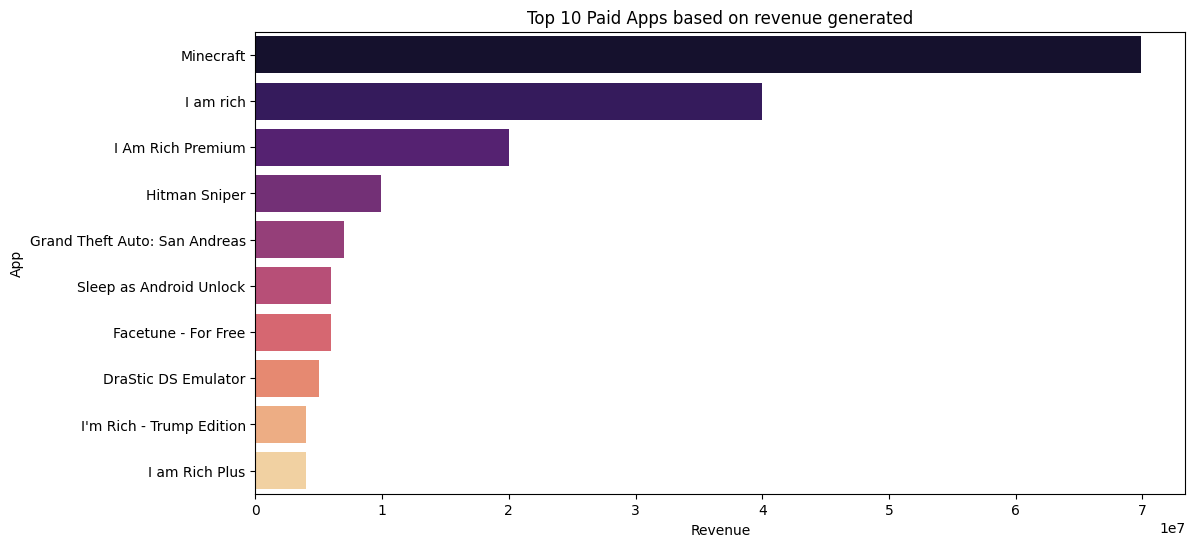

In [246]:
#plot top 10 paid apps based on revenue generated
plt.figure(figsize=(12,6))
sns.barplot(x='Revenue',y="App",data=df[(df["Type"]=="Paid") & (df["Revenue"]>0)].sort_values("Revenue",ascending=False).head(11).drop_duplicates(subset=["App"]), palette="magma")
plt.title("Top 10 Paid Apps based on revenue generated")
plt.show()

**Observation:**

-Revenue generated  formula: **Revenue=Installs*Price**

-here revenue refers to the money earned only from paid app installs.

-The top Categories in which these apps falls are **lifestyle, family, Game**

-**Minecraft, I am rich and I Am Rich Premium** are the top paid apps based on revenue generated

In [247]:
df_user.head(10)

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   
6  10 Best Foods for You                                            Amazing   
7  10 Best Foods for You                                                NaN   
8  10 Best Foods for You                               Looking forward app,   
9  10 Best Foods for You              It helpful site ! It help foods get !   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000  
6  Positive                0.60                0.900000  
7       NaN                 NaN                     NaN  
8   Neutral                0.00                0.000000  
9   Neutral                0.00                0.000000

In [248]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [249]:
df_user.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

Datatype are perfect. No need to change


In [250]:
nan_rows = df_user[df_user.isnull().any(axis=1)]
print(nan_rows)

                                                     App Translated_Review  \
2                                  10 Best Foods for You               NaN   
7                                  10 Best Foods for You               NaN   
15                                 10 Best Foods for You               NaN   
102                                10 Best Foods for You               NaN   
107                                10 Best Foods for You               NaN   
115                                10 Best Foods for You               NaN   
268                                                 11st               NaN   
362                      1LINE – One Line with One Touch               NaN   
368                      1LINE – One Line with One Touch               NaN   
405     2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif               NaN   
407     2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif               NaN   
409     2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif        

In [251]:
nan_rows.shape


(26868, 5)

**We can see that 26868 rows have NaN value with all three columns except App column so, we can drop this Nan value directly**

In [252]:
df_user.dropna(inplace=True)

In [253]:
df_user.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [254]:
df_user.duplicated().sum()

np.int64(7735)

In [255]:
df_user.drop_duplicates(inplace=True)

In [256]:
df_user.duplicated().sum()

np.int64(0)

In [257]:
#df_user.to_csv("UserReviewCleaned.csv")

**Lets merge Two data frame frame for more explorations**

In [258]:
merge_data = pd.merge(df, df_user,how="left", on = "App")

In [259]:
merge_data.head(10)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   
2                             Coloring book moana  ART_AND_DESIGN     3.9   
3                             Coloring book moana  ART_AND_DESIGN     3.9   
4                             Coloring book moana  ART_AND_DESIGN     3.9   
5                             Coloring book moana  ART_AND_DESIGN     3.9   
6                             Coloring book moana  ART_AND_DESIGN     3.9   
7                             Coloring book moana  ART_AND_DESIGN     3.9   
8                             Coloring book moana  ART_AND_DESIGN     3.9   
9                             Coloring book moana  ART_AND_DESIGN     3.9   

   Reviews  Size(bytes)  Installs  Type  Price Content Rating  \
0      159   19922944.0     10000  Free    0.0       Everyone   
1      967   14680064.0    500000  Free    0.0       Everyone   
2      967   14680064.0    500000  Free    0.0       Everyone   
3      967   14680064.0    500000  Free    0.0       Everyone   
4      967   14680064.0    500000  Free    0.0       Everyone   
5      967   14680064.0    500000  Free    0.0       Everyone   
6      967   14680064.0    500000  Free    0.0       Everyone   
7      967   14680064.0    500000  Free    0.0       Everyone   
8      967   14680064.0    500000  Free    0.0       Everyone   
9      967   14680064.0    500000  Free    0.0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  \
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   
2  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   
3  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   
4  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   
5  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   
6  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   
7  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   
8  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   
9  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   

  Installs_Category  Revenue  \
0          Moderate      0.0   
1              High      0.0   
2              High      0.0   
3              High      0.0   
4              High      0.0   
5              High      0.0   
6              High      0.0   
7              High      0.0   
8              High      0.0   
9              High      0.0   

                                   Translated_Review Sentiment  \
0                                                NaN       NaN   
1  A kid's excessive ads. The types ads allowed a...  Negative   
2                                         It bad >:(  Negative   
3                                               like   Neutral   
4                           I love colors inspyering  Positive   
5                                             I hate  Negative   
6                                           omgggggg   Neutral   
7                                           It cute.  Positive   
8                                             I love  Positive   
9                                               Love  Positive   

   Sentiment_Polarity  Sentiment_Subjectivity  
0                 NaN                     NaN  
1              -0.250                1.000000  
2              -0.725                0.833333  
3               0.000                0.000000  
4               0.500                0.600000  
5              -0.800                0.900000  
6               0.000                0.000000  
7               0.500                1.000000  
8               0.500                0.600000  
9               0.500                0.600000

In [260]:
merge_data.shape

(49681, 19)

In [261]:
merge_data.duplicated().sum()

np.int64(0)

In [262]:
merge_data.isnull().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size(bytes)               15061
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Installs_Category             0
Revenue                       0
Translated_Review          9267
Sentiment                  9267
Sentiment_Polarity         9267
Sentiment_Subjectivity     9267
dtype: int64

In [263]:
merge_new=merge_data.dropna(subset=["Translated_Review","Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"])

In [264]:
merge_new.shape

(40414, 19)

In [265]:
49681-9267


40414

In [266]:
merge_new.isnull().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size(bytes)               13891
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Installs_Category             0
Revenue                       0
Translated_Review             0
Sentiment                     0
Sentiment_Polarity            0
Sentiment_Subjectivity        0
dtype: int64

In [267]:
merge_new.to_csv("Merge2DF.csv")

**#Sentiment Polarity by Type(Free and Paid)**

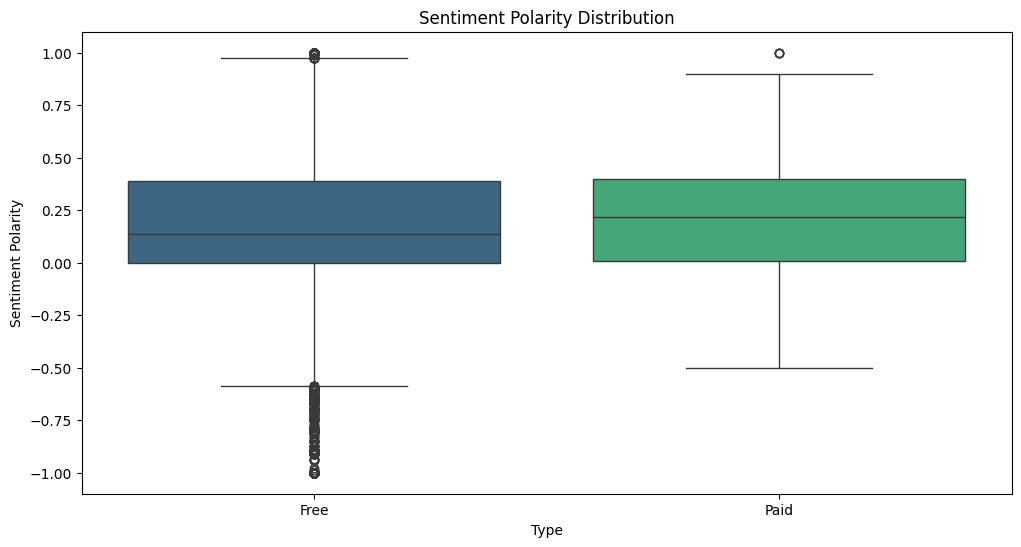

In [268]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merge_data, palette="viridis")
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Type')
plt.ylabel('Sentiment Polarity')
plt.show()

In [269]:
merge_data.groupby(["Type","Sentiment"])["Sentiment"].count()

Type  Sentiment
Free  Negative      9595
      Neutral       5036
      Positive     25413
Paid  Negative        64
      Neutral         26
      Positive       280
Name: Sentiment, dtype: int64

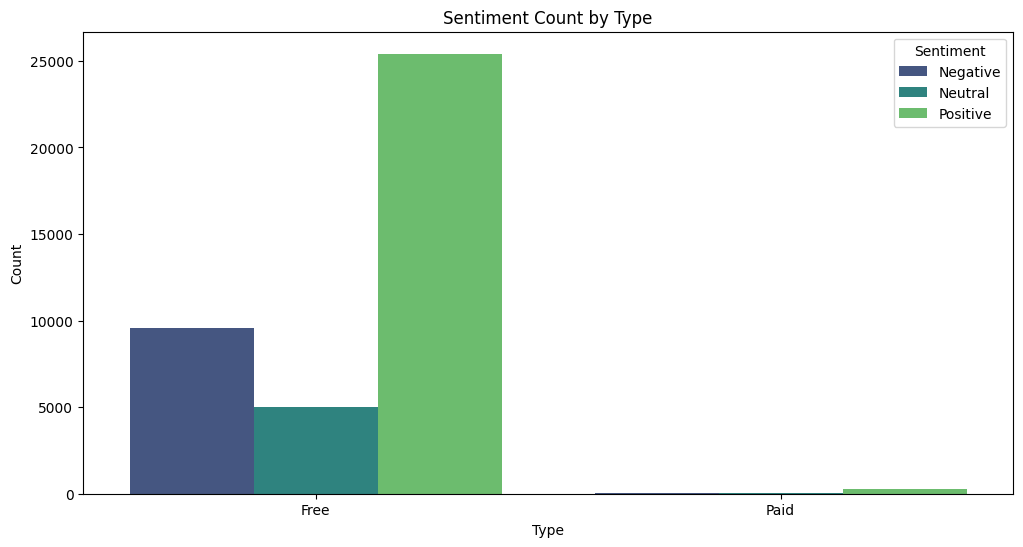

In [270]:
#plot Sentiment count by type
plt.figure(figsize=(12, 6))
sns.countplot(x='Type', hue='Sentiment', data=merge_data, palette="viridis")
plt.title('Sentiment Count by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


**Observation:**  
**Free apps** get way more feedback overall—both good and bad—since more people use them. But even with some **negative reviews**, most feedback is **positive**.  
**Paid apps** have fewer reviews, but most of them are also **positive**, which shows that people are generally happy when they pay for something they find valuable.

**#Percentage of Reviews sentiments**

In [271]:
merge_data["Sentiment"].value_counts()

Sentiment
Positive    25693
Negative     9659
Neutral      5062
Name: count, dtype: int64

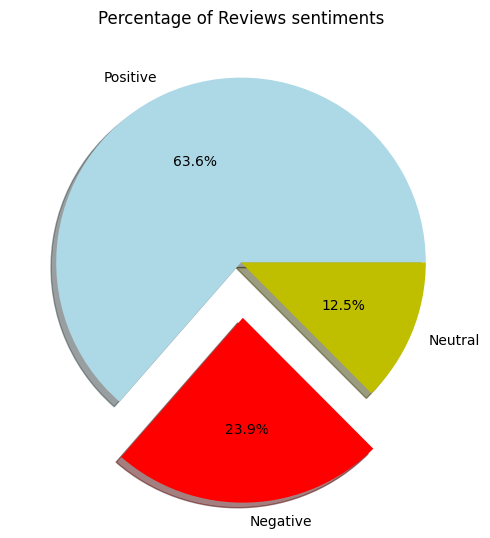

In [272]:
#pie plot to show Percentage of Reviews sentiments
plt.figure(figsize=(12, 6))
plt.pie(merge_data["Sentiment"].value_counts(), labels=["Positive","Negative","Neutral"], shadow=True,autopct='%1.1f%%', colors=['lightblue', 'red', 'y'],explode=(0,0.3,0))
plt.title('Percentage of Reviews sentiments')
plt.show()


**#Top apps by positive Reviews and Top Apps by Negative Reviews**

In [273]:
merge_data[merge_data["Sentiment"]=="Positive"].groupby(["App"]).count().sort_values("Sentiment",ascending=False).head(10)

Category  Rating  Reviews  Size(bytes)  \
App                                                                      
Helix Jump                           378     378      378          378   
8 Ball Pool                          336     336      336          336   
Google Photos                        304     304      304            0   
Bubble Shooter                       294     294      294          294   
Bowmasters                           265     265      265            0   
Angry Birds Classic                  235     235      235          235   
Clash Royale                         232     232      232          232   
Duolingo: Learn Languages Free       225     225      225            0   
DRAGON BALL LEGENDS                  210     210      210          210   
Adobe Acrobat Reader                 201     201      201            0   

                                Installs  Type  Price  Content Rating  Genres  \
App                                                                             
Helix Jump                           378   378    378             378     378   
8 Ball Pool                          336   336    336             336     336   
Google Photos                        304   304    304             304     304   
Bubble Shooter                       294   294    294             294     294   
Bowmasters                           265   265    265             265     265   
Angry Birds Classic                  235   235    235             235     235   
Clash Royale                         232   232    232             232     232   
Duolingo: Learn Languages Free       225   225    225             225     225   
DRAGON BALL LEGENDS                  210   210    210             210     210   
Adobe Acrobat Reader                 201   201    201             201     201   

                                Last Updated  Current Ver  Android Ver  \
App                                                                      
Helix Jump                               378          378          378   
8 Ball Pool                              336          336          336   
Google Photos                            304          304          304   
Bubble Shooter                           294          294          294   
Bowmasters                               265          265          265   
Angry Birds Classic                      235          235          235   
Clash Royale                             232          232          232   
Duolingo: Learn Languages Free           225          225          225   
DRAGON BALL LEGENDS                      210          210          210   
Adobe Acrobat Reader                     201          201          201   

                                Installs_Category  Revenue  Translated_Review  \
App                                                                             
Helix Jump                                    378      378                378   
8 Ball Pool                                   336      336                336   
Google Photos                                 304      304                304   
Bubble Shooter                                294      294                294   
Bowmasters                                    265      265                265   
Angry Birds Classic                           235      235                235   
Clash Royale                                  232      232                232   
Duolingo: Learn Languages Free                225      225                225   
DRAGON BALL LEGENDS                           210      210                210   
Adobe Acrobat Reader                          201      201                201   

                                Sentiment  Sentiment_Polarity  \
App                                                             
Helix Jump                            378                 378   
8 Ball Pool                           336                 336   
Google Photos                         304       

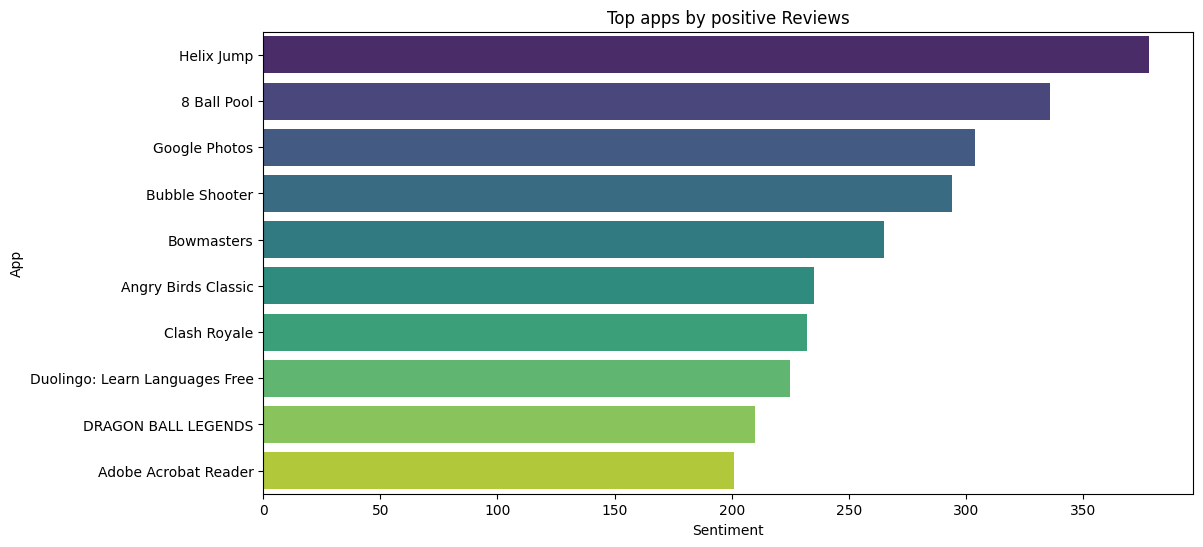

In [274]:
#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Sentiment',y="App",data=merge_data[merge_data["Sentiment"]=="Positive"].groupby(["App"]).count().sort_values("Sentiment",ascending=False).head(10), palette="viridis")
plt.title('Top apps by positive Reviews')
plt.show()

**Observation:**
Helix Jump app has highest 378 positive Sentiment count.

In [275]:
merge_data[(merge_data["App"]=="Helix Jump") & (merge_data["Sentiment"]=="Positive")].shape

(378, 19)

In [276]:
merge_data[merge_data["Sentiment"]=="Negative"].groupby(["App"]).count().sort_values("Sentiment",ascending=False).head(10)

Category  Rating  Reviews  Size(bytes)  Installs  Type  \
App                                                                             
8 Ball Pool                 322     322      322          322       322   322   
Angry Birds Classic         295     295      295          295       295   295   
Bowmasters                  180     180      180            0       180   180   
Helix Jump                  168     168      168          168       168   168   
Clash Royale                152     152      152          152       152   152   
Candy Crush Soda Saga       150     150      150          150       150   150   
Bubble Shooter              144     144      144          144       144   144   
Block Puzzle                120     120      120          120       120   120   
Facebook                    118     118      118            0       118   118   
Cooking Fever               114     114      114          114       114   114   

                       Price  Content Rating  Genres  Last Updated  \
App                                                                  
8 Ball Pool              322             322     322           322   
Angry Birds Classic      295             295     295           295   
Bowmasters               180             180     180           180   
Helix Jump               168             168     168           168   
Clash Royale             152             152     152           152   
Candy Crush Soda Saga    150             150     150           150   
Bubble Shooter           144             144     144           144   
Block Puzzle             120             120     120           120   
Facebook                 118             118     118           118   
Cooking Fever            114             114     114           114   

                       Current Ver  Android Ver  Installs_Category  Revenue  \
App                                                                           
8 Ball Pool                    322          322                322      322   
Angry Birds Classic            295          295                295      295   
Bowmasters                     180          180                180      180   
Helix Jump                     168          168                168      168   
Clash Royale                   152          152                152      152   
Candy Crush Soda Saga          150          150                150      150   
Bubble Shooter                 144          144                144      144   
Block Puzzle                   120          120                120      120   
Facebook                       118          118                118      118   
Cooking Fever                  114          114                114      114   

                       Translated_Review  Sentiment  Sentiment_Polarity  \
App                                                                       
8 Ball Pool                          322        322                 322   
Angry Birds Classic                  295        295                 295   
Bowmasters                           180        180                 180   
Helix Jump                           168        168                 168   
Clash Royale                         152        152                 152   
Candy Crush Soda Saga                150        150                 150   
Bubble Shooter                       144        144                 144   
Block Puzzle                         120        120                 120   
Facebook                             118        118                 118   
Cooking Fever                        114        114                 114   

                       Sentiment_Subjectivity  
App                                            
8 Ball Pool                               322  
Angry Birds Classic                       295  
Bowmasters                                180  
Helix Jump                                168  
Clash Royale                              152  
Candy Crush Soda Saga  

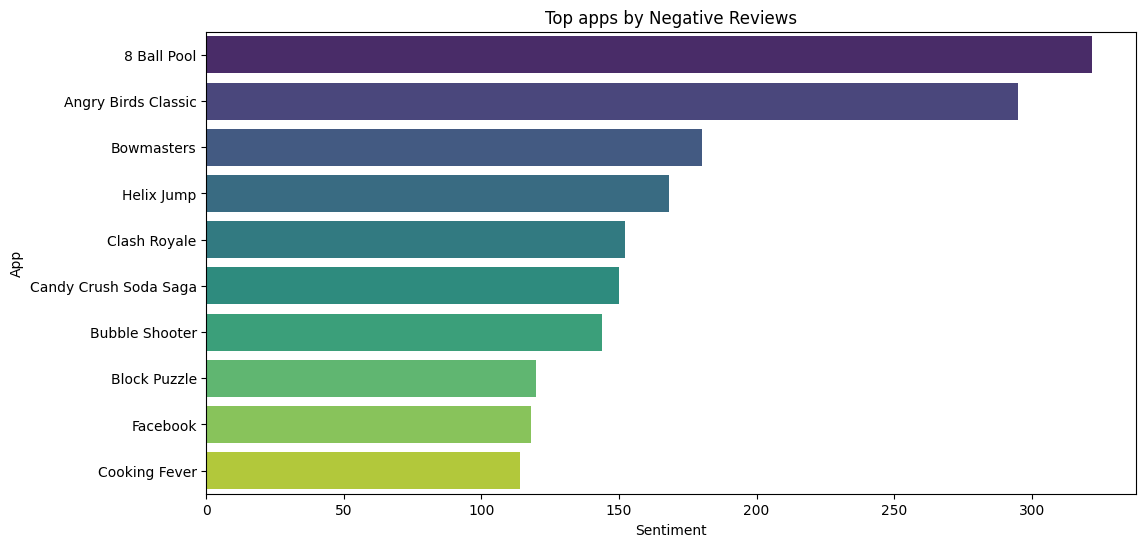

In [277]:
#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Sentiment',y="App",data=merge_data[merge_data["Sentiment"]=="Negative"].groupby(["App"]).count().sort_values("Sentiment",ascending=False).head(10), palette="viridis")
plt.title('Top apps by Negative Reviews')
plt.show()

**Observation:**
8 Ball Pool app has highest 322 positive Sentiment count.